In [ ]:
# mount colab drive

from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [ ]:
# add this notebook's folder path

folder_thisNotebook = 'NGA/Foundation/Transliteration'

In [ ]:
# This notebook's folder path
path_drive_folder_thisNotebook = 'drive/My Drive/Colab Notebooks/' + folder_thisNotebook

In [ ]:
print('Copy this to cd to path:\n\n'+path_drive_folder_thisNotebook)

Copy this to cd to path:

drive/My Drive/Colab Notebooks/NGA/Foundation/Transliteration


In [ ]:
# Paste path here:
%cd drive/My Drive/Colab Notebooks/NGA/Foundation/Transliteration

/content/drive/My Drive/Colab Notebooks/NGA/Foundation/Transliteration


In [ ]:
import pathlib
import random
import string
import re
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import TextVectorization

In [ ]:
import pandas as pd

## Load pre-processed and saved data

In [ ]:
# pandas requires latest version of openpyxl, use -U tag
!pip install openpyxl -U

     |████████████████████████████████| 242 kB 5.3 MB/s 
  Attempting uninstall: openpyxl
    Found existing installation: openpyxl 2.5.9
    Uninstalling openpyxl-2.5.9:
      Successfully uninstalled openpyxl-2.5.9


## Geonames

In [ ]:
df_geonames = pd.read_excel('geonames.xlsx')
df_geonames.shape

(36917, 2)

In [ ]:
text_pairs = df_geonames.values
text_pairs.shape

(36917, 2)

##  Train

In [ ]:
df_train = pd.read_excel('split_data/train.xlsx')
df_train.shape

(29535, 3)

In [ ]:
df_train

,Unnamed: 0,Arabic,Romanized
0,0,وادي,Wādī
1,1,خربة,Khirbat
2,2,قرية,Qaryah
3,3,مدرسة,Madrasah
4,4,وادي,Wādī
...,...,...,...
29530,29530,وحدة صحية عيان,Waḩdah Şiḩḩīyah ‘Ayyān
29531,29531,قبة الشيخ زيات,Qubbat ash Shaykh Zayyāt
29532,29532,ضهور النعمية,Ḑuhūr an Nu‘mīyah
29533,29533,المركز الصحي السلخانة,Al Markaz aş Şiḩḩīy as Sulkhānah


In [ ]:
train_pairs = []
source_lang = df_train['Arabic']
target_lang = df_train['Romanized']

for count in range(df_train['Arabic'].shape[0]):

  if isinstance(source_lang[count], str) and isinstance(target_lang[count], str):
      

    source = source_lang[count]
    #source_lang = source_lang.replace("\n", "")
    #target_lang = target_lang.replace("\n", "")
    target = "[" + target_lang[count] + "]"

    train_pairs.append((source,target))

In [ ]:
print(train_pairs[0])

('وادي', '[Wādī]')


## Validation

In [ ]:
df_validation = pd.read_excel('split_data/validation.xlsx')
df_validation.shape

(3691, 3)

In [ ]:
df_validation

,Unnamed: 0,Arabic,Romanized
0,0,المفرح الأشـم,Al Mafraḩ al Asham
1,1,تل مراغة,Tall Marāghah
2,2,مالحة صغيرة,Māliḩah Şaghīrah
3,3,العبرونيات,Al ‘Abrūnīyāt
4,4,مسادة,Masādah
...,...,...,...
3686,3686,خربة حارة بيت جريفة,Khirbat Ḩārat Bayt Jurayfah
3687,3687,وادي النوم,Wādī an Nawm
3688,3688,غارة السوق,Ghārat as Sūq
3689,3689,التوافيق القديمة,At Tawāfīq al Qadīmah


In [ ]:
val_pairs = []
source_lang = df_validation['Arabic']
target_lang = df_validation['Romanized']

for count in range(df_validation['Arabic'].shape[0]):

  if isinstance(source_lang[count], str) and isinstance(target_lang[count], str):
      

    source = source_lang[count]
    #source_lang = source_lang.replace("\n", "")
    #target_lang = target_lang.replace("\n", "")
    target = "[" + target_lang[count] + "]"

    val_pairs.append((source,target))

In [ ]:
print(val_pairs[0])

('المفرح الأشـم', '[Al Mafraḩ al Asham]')


## Test

In [ ]:
df_test = pd.read_excel('split_data/test.xlsx')
df_test.shape

(3691, 3)

In [ ]:
df_test

,Unnamed: 0,Arabic,Romanized
0,0,تل شريع,Tall Sharī‘
1,1,وادي الشيخ بارخ,Wādī ash Shaykh Bārikh
2,2,وادي بريبج,Wādī Buraybij
3,3,خربة عين سلوغي,Khirbat ‘Ayn Sallūghī
4,4,ذراع قياش,Dhirā‘ Qiyāsh
...,...,...,...
3686,3686,حبية,Ḩabīyah
3687,3687,خربة سني,Khirbat Sunnī
3688,3688,السبكة,As Sabakah
3689,3689,بلاد بن عوض,Bilād Bin ‘Awaḑ


In [ ]:
test_pairs = []
source_lang = df_test['Arabic']
target_lang = df_test['Romanized']

for count in range(df_test['Arabic'].shape[0]):

  if isinstance(source_lang[count], str) and isinstance(target_lang[count], str):
      

    source = source_lang[count]
    #source_lang = source_lang.replace("\n", "")
    #target_lang = target_lang.replace("\n", "")
    target = "[" + target_lang[count] + "]"

    test_pairs.append((source,target))

In [ ]:
print(test_pairs[0])

('تل شريع', '[Tall Sharī‘]')


In [ ]:
print(f"{len(text_pairs)} total pairs")
print(f"{len(train_pairs)} training pairs")
print(f"{len(val_pairs)} validation pairs")
print(f"{len(test_pairs)} test pairs")

36917 total pairs
29535 training pairs
3691 validation pairs
3691 test pairs


## Keras custom word tokenization

In [ ]:
import re
import string
import tensorflow as tf

def custom_split_fn(string_tensor):
    return tf.strings.split(string_tensor, '')

In [ ]:
custom_split_fn(['string', 'word', 'two words']) # does not seperate by '' either

<tf.RaggedTensor [[b'string'], [b'word'], [b'two', b'words']]>

## split by character to tokenize words

In [ ]:
def char_split(input_data):
  return tf.strings.unicode_split(input_data, 'UTF-8')

In [ ]:
char_split('two words') # does not seperate by '' either

<tf.Tensor: shape=(9,), dtype=string, numpy=array([b't', b'w', b'o', b' ', b'w', b'o', b'r', b'd', b's'], dtype=object)>

In [ ]:
' ' in string.punctuation

False

In [ ]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
strip_chars = string.punctuation
strip_chars = strip_chars.replace("[", "")
strip_chars = strip_chars.replace("]", "")

vocab_size = 100
sequence_length = 128 # max characters of phrase
batch_size = 64


def custom_standardization(input_string):
    lowercase = tf.strings.lower(input_string)
    return tf.strings.regex_replace(lowercase, "[%s]" % re.escape(strip_chars), "")


source_vectorization = TextVectorization(
    max_tokens=vocab_size, output_mode="int", output_sequence_length=sequence_length,
    #split=custom_split_fn
    split=char_split                              # from above

)
target_vectorization = TextVectorization(
    max_tokens=vocab_size,
    output_mode="int",
    output_sequence_length=sequence_length + 1,
    standardize=custom_standardization,
    #split=custom_split_fn
    split=char_split                              # from above
)

source_target_texts = [pair[0] for pair in train_pairs]
target_target_texts = [pair[1] for pair in train_pairs]
source_vectorization.adapt(source_target_texts)
target_vectorization.adapt(target_target_texts)

In [ ]:
for i in range(5):
    print(source_target_texts[i] + '\t' + target_target_texts[i])

وادي	[Wādī]
خربة	[Khirbat]
قرية	[Qaryah]
مدرسة	[Madrasah]
وادي	[Wādī]


In [ ]:
source_vocab = source_vectorization.get_vocabulary()
len(source_vocab)

77

In [ ]:
count = 0

for i in range(len(source_vocab)):
  if count >= 10:
    count = 0
    print('\n')
    continue
  print(source_vocab[i],end='')
  print('\t', end='')
  count+=1

	[UNK]	ا	ل	 	ي	ر	ة	ب	و	

ن	د	ع	ح	س	ت	ج	ق	ش	ك	

ف	ز	ص	أ	ط	ه	ض	غ	ئ	ظ	

ث	ذ	ء	آ	ّ	إ	ـ	נ	چ	ח	

ל	ר	י	ן	ו	ג	מ	ב	’	ש	

ע	ס	١	כ	ד	ڤ	٧	ק	ך	٦	

پ	٤	٢	ُ	َ	פ	ה	٩	٨	ِ	



In [ ]:
target_vocab = target_vectorization.get_vocabulary()
len(target_vocab)

59

In [ ]:
print(target_vocab)

['', '[UNK]', 'a', ' ', ']', '[', 'h', 'l', 'r', 'ā', 'ī', 'b', 's', 'm', 'y', 't', 'n', 'd', 'i', 'u', 'w', 'k', '‘', 'j', 'ū', 'q', 'z', 'ḩ', 'f', 'Ḩ', 'ş', 'ţ', 'Ş', 'ḑ', 'g', '’', 'Ţ', '̧', 'á', 'Ā', 'Ḑ', 'Ū', 'Ī', 'c', 'ẖ', 'e', 'ṭ', 'v', 'ṣ', 'o', '·', 'p', 'Ṭ', 'Ṣ', 'ḏ', 'Ḏ', 'ḍ', '̱', 'ı']


In [ ]:
count = 0

for i in range(len(target_vocab)):
  if count >= 10:
    count = 0
    print('\n')
    continue
  print(target_vocab[i],end='')
  print('\t', end='')
  count+=1

	[UNK]	a	 	]	[	h	l	r	ā	

b	s	m	y	t	n	d	i	u	w	

‘	j	ū	q	z	ḩ	f	Ḩ	ş	ţ	

ḑ	g	’	Ţ	̧	á	Ā	Ḑ	Ū	Ī	

ẖ	e	ṭ	v	ṣ	o	·	p	Ṭ	Ṣ	

Ḏ	ḍ	̱	ı	

In [ ]:
def format_dataset(source, target):
    source = source_vectorization(source)
    target = target_vectorization(target)
    return ({"encoder_inputs": source, "decoder_inputs": target[:, :-1],}, target[:, 1:])


def make_dataset(pairs):
    source_texts, target_texts = zip(*pairs)
    source_texts = list(source_texts)
    target_texts = list(target_texts)
    dataset = tf.data.Dataset.from_tensor_slices((source_texts, target_texts))
    dataset = dataset.batch(batch_size)
    dataset = dataset.map(format_dataset)
    return dataset.shuffle(2048).prefetch(16).cache()


train_ds = make_dataset(train_pairs)
val_ds = make_dataset(val_pairs)
test_ds = make_dataset(test_pairs)

In [ ]:
for inputs, targets in train_ds.take(1):
    print(f'inputs["encoder_inputs"].shape: {inputs["encoder_inputs"].shape}')
    print(f'inputs["decoder_inputs"].shape: {inputs["decoder_inputs"].shape}')
    print(f"targets.shape: {targets.shape}")

inputs["encoder_inputs"].shape: (64, 128)
inputs["decoder_inputs"].shape: (64, 128)
targets.shape: (64, 128)


In [ ]:
class TransformerEncoder(layers.Layer):
    def __init__(self, embed_dim, dense_dim, num_heads, **kwargs):
        super(TransformerEncoder, self).__init__(**kwargs)
        self.embed_dim = embed_dim
        self.dense_dim = dense_dim
        self.num_heads = num_heads
        self.attention = layers.MultiHeadAttention(
            num_heads=num_heads, key_dim=embed_dim
        )
        self.dense_proj = keras.Sequential(
            [layers.Dense(dense_dim, activation="relu"), layers.Dense(embed_dim),]
        )
        self.layernorm_1 = layers.LayerNormalization()
        self.layernorm_2 = layers.LayerNormalization()
        self.supports_masking = True

    def call(self, inputs, mask=None):
        if mask is not None:
            padding_mask = tf.cast(mask[:, tf.newaxis, tf.newaxis, :], dtype="int32")
        attention_output = self.attention(
            query=inputs, value=inputs, key=inputs, attention_mask=padding_mask
        )
        proj_input = self.layernorm_1(inputs + attention_output)
        proj_output = self.dense_proj(proj_input)
        return self.layernorm_2(proj_input + proj_output)

# CHANGED
    def get_config(self):
        config = super().get_config()
        config.update({
            "embed_dim": self.embed_dim,
            "num_heads": self.num_heads,
            "dense_dim": self.dense_dim,
        })
        return config
# end CHANGED

class PositionalEmbedding(layers.Layer):
    def __init__(self, sequence_length, vocab_size, embed_dim, **kwargs):
        super(PositionalEmbedding, self).__init__(**kwargs)
        self.token_embeddings = layers.Embedding(
            input_dim=vocab_size, output_dim=embed_dim
        )
        self.position_embeddings = layers.Embedding(
            input_dim=sequence_length, output_dim=embed_dim
        )
        self.sequence_length = sequence_length
        self.vocab_size = vocab_size
        self.embed_dim = embed_dim

    def call(self, inputs):
        length = tf.shape(inputs)[-1]
        positions = tf.range(start=0, limit=length, delta=1)
        embedded_tokens = self.token_embeddings(inputs)
        embedded_positions = self.position_embeddings(positions)
        return embedded_tokens + embedded_positions

    def compute_mask(self, inputs, mask=None):
        return tf.math.not_equal(inputs, 0)
# CHANGED
    def get_config(self):
        config = super().get_config()
        config.update({
            "vocab_size": self.vocab_size,
            "sequence_length": self.sequence_length,
            "embed_dim": self.embed_dim,
        })
        return config
# end CHANGED

class TransformerDecoder(layers.Layer):
    def __init__(self, embed_dim, latent_dim, num_heads, **kwargs):
        super(TransformerDecoder, self).__init__(**kwargs)
        self.embed_dim = embed_dim
        self.latent_dim = latent_dim
        self.num_heads = num_heads
        self.attention_1 = layers.MultiHeadAttention(
            num_heads=num_heads, key_dim=embed_dim
        )
        self.attention_2 = layers.MultiHeadAttention(
            num_heads=num_heads, key_dim=embed_dim
        )
        self.dense_proj = keras.Sequential(
            [layers.Dense(latent_dim, activation="relu"), layers.Dense(embed_dim),]
        )
        self.layernorm_1 = layers.LayerNormalization()
        self.layernorm_2 = layers.LayerNormalization()
        self.layernorm_3 = layers.LayerNormalization()
        self.supports_masking = True

    def call(self, inputs, encoder_outputs, mask=None):
        causal_mask = self.get_causal_attention_mask(inputs)
        if mask is not None:
            padding_mask = tf.cast(mask[:, tf.newaxis, :], dtype="int32")
            padding_mask = tf.minimum(padding_mask, causal_mask)

        attention_output_1 = self.attention_1(
            query=inputs, value=inputs, key=inputs, attention_mask=causal_mask
        )
        out_1 = self.layernorm_1(inputs + attention_output_1)

        attention_output_2 = self.attention_2(
            query=out_1,
            value=encoder_outputs,
            key=encoder_outputs,
            attention_mask=padding_mask,
        )
        out_2 = self.layernorm_2(out_1 + attention_output_2)

        proj_output = self.dense_proj(out_2)
        return self.layernorm_3(out_2 + proj_output)

    def get_causal_attention_mask(self, inputs):
        input_shape = tf.shape(inputs)
        batch_size, sequence_length = input_shape[0], input_shape[1]
        i = tf.range(sequence_length)[:, tf.newaxis]
        j = tf.range(sequence_length)
        mask = tf.cast(i >= j, dtype="int32")
        mask = tf.reshape(mask, (1, input_shape[1], input_shape[1]))
        mult = tf.concat(
            [tf.expand_dims(batch_size, -1), tf.constant([1, 1], dtype=tf.int32)],
            axis=0,
        )
        return tf.tile(mask, mult)
# CHANGED
    def get_config(self):
        config = super().get_config()
        config.update({
            "embed_dim": self.embed_dim,
            "num_heads": self.num_heads,
            "latent_dim": self.latent_dim,
        })
        return config
# end CHANGED

In [ ]:
embed_dim = 256
latent_dim = 2048
num_heads = 8

encoder_inputs = keras.Input(shape=(None,), dtype="int64", name="encoder_inputs")
x = PositionalEmbedding(sequence_length, vocab_size, embed_dim)(encoder_inputs)
encoder_outputs = TransformerEncoder(embed_dim, latent_dim, num_heads)(x)
encoder = keras.Model(encoder_inputs, encoder_outputs)

decoder_inputs = keras.Input(shape=(None,), dtype="int64", name="decoder_inputs")
encoded_seq_inputs = keras.Input(shape=(None, embed_dim), name="decoder_state_inputs")
x = PositionalEmbedding(sequence_length, vocab_size, embed_dim)(decoder_inputs)
x = TransformerDecoder(embed_dim, latent_dim, num_heads)(x, encoded_seq_inputs)
x = layers.Dropout(0.5)(x)
decoder_outputs = layers.Dense(vocab_size, activation="softmax")(x)
decoder = keras.Model([decoder_inputs, encoded_seq_inputs], decoder_outputs)

decoder_outputs = decoder([decoder_inputs, encoder_outputs])
transformer_geonames = keras.Model(
    [encoder_inputs, decoder_inputs], decoder_outputs, name="transformer"
)

In [ ]:
transformer_geonames = keras.models.load_model(
    "transformer_geonames.keras",
    custom_objects={"TransformerEncoder": TransformerEncoder,
                    "PositionalEmbedding": PositionalEmbedding,
                    "TransformerDecoder": TransformerDecoder}) 
print(f"Test acc: {transformer_geonames.evaluate(test_ds)[1]:.3f}")

58/58 [==============================] - 13s 162ms/step - loss: 0.0212 - accuracy: 0.9526
Test acc: 0.953


In [ ]:
target_vocab = target_vectorization.get_vocabulary()
target_index_lookup = dict(zip(range(len(target_vocab)), target_vocab))
max_decoded_sentence_length = 128 # should be longer than longest sentence which is 49 characters, from Transliteration_dataset_exploration.ipynb


def decode_sequence(input_sentence):
    tokenized_input_sentence = source_vectorization([input_sentence])
    decoded_sentence = "["
    for i in range(max_decoded_sentence_length):
        tokenized_target_sentence = target_vectorization([decoded_sentence])[:, :-1]
        predictions = transformer_geonames([tokenized_input_sentence, tokenized_target_sentence])

        sampled_token_index = np.argmax(predictions[0, i, :])
        sampled_token = target_index_lookup[sampled_token_index]
        decoded_sentence += "" + sampled_token

        if sampled_token == "]":
            break
    return decoded_sentence


test_source_texts = [pair[0] for pair in test_pairs]
test_target_texts = [pair[1] for pair in test_pairs]

transliterated_test_pairs = []

for _ in range(100):
    #input_sentence = random.choice(test_source_texts)
    input_sentence = (test_source_texts[_])
    translated = decode_sequence(test_source_texts[_])


    #line_print = '{:>30}  {:>30}  {:>30}'.format(input_sentence, translated, test_target_texts[_])
    #print(line_print)
    
    transliterated_test_pairs.append(translated)

In [ ]:
index = int(input('Sample index: '))
src_indx = 0
tar_indx = 1

source_example = test_pairs[index][src_indx]
target_example = test_pairs[index][tar_indx]
romanized_example = decode_sequence(test_pairs[index][src_indx])

print('Source example: ',source_example, sep = '\t')
print('Target example: ',target_example, sep = '\t')
print('Romanized: ',romanized_example, sep = '\t\t')

Sample index: 9
Source example: 	طراد
Target example: 	[Ţirād]
Romanized: 		[Ţirād]


## transliterated_test_pairs contains predictions from test_pairs
#### use to combin with test_pairs for metrics

In [ ]:
for i in range(len(transliterated_test_pairs)):
  print(test_source_texts[i], transliterated_test_pairs[i], test_target_texts[i])

تل شريع [tall sharī‘] [Tall Sharī‘]
وادي الشيخ بارخ [wādī ash shaykh bārikh] [Wādī ash Shaykh Bārikh]
وادي بريبج [wādī barībij] [Wādī Buraybij]
خربة عين سلوغي [khirbat ‘ayn sallūghī] [Khirbat ‘Ayn Sallūghī]
ذراع قياش [dhirā‘ qayyāsh] [Dhirā‘ Qiyāsh]
وادي الأرض الشمالي [wādī al arḑ ash shamālī] [Wādī al Arḑ ash Shamālī]
الخويمات [al khuwaymāt] [Al Khuwaymāt]
ال غانم إبن حسين [Āl ghān mib nuḩsaban] [Āl Ghānim Ibn Ḩusayn]
طلاع الحصى [Ţallā‘ al Ḩaşá] [Ţallā‘ al Ḩaşá]
طراد [Ţirād] [Ţirād]
وحدة عزمان [waḩdat ‘azmān] [Waḩdat ‘Uzmān]
أراضي القطعانية [arāḑī al quţ‘ānīyah] [Arāḑī al Qaţ‘ānīyah]
قارورة [qārūrah] [Qārūrah]
قارة [qārah] [Qārah]
خربة قرن تل [khirbat qarn tall] [Khirbat Qarn Tall]
عنجوج [‘anjūj] [‘Unjūj]
الوحدة الصحية بني جعفر [al waḩdah aş Şiḩḩīyah banī ja‘far] [Al Waḩdah aş Şiḩḩīyah Banī Ja‘far]
ال جعبل [Āl ju‘bul] [Āl Ja‘bal]
المجلية [al majallīyah] [Al Majallīyah]
الصلحاف [aş Şalḩāf] [Aş Şulḩāf]
تل ديباك [tall dībāk] [Tall Dībāk]
رهوان [rahwān] [Rahwān]
منطر العابد [munţar al ‘Āb

## add test source, target & predictions to df

In [ ]:
df_translit = pd.DataFrame(list(zip(test_source_texts, test_target_texts, transliterated_test_pairs)), columns =['source', 'target', 'romanized'])

In [ ]:
df_translit.columns

Index(['source', 'target', 'romanized'], dtype='object')

In [ ]:
df_translit['romanized']

0                [tall sharī‘]
1     [wādī ash shaykh bārikh]
2               [wādī barībij]
3      [khirbat ‘ayn sallūghī]
4             [dhirā‘ qayyāsh]
                ...           
95                 [al baywad]
96            [shi‘bat silţān]
97                  [al Ḩāfah]
98              [qal‘ ar rāmī]
99                    [kuḩlah]
Name: romanized, Length: 100, dtype: object

## nltk function for character error rate

In [ ]:
import nltk

In [ ]:
target_example = df_translit['target'][0]
romanized_example = df_translit['romanized'][0]

print(target_example)
print(romanized_example)

nltk.edit_distance(target_example, romanized_example)

[Tall Sharī‘]
[tall sharī‘]


2

In [ ]:
# using lower edit distance is 0, not 2

print(nltk.edit_distance(target_example.lower(), romanized_example))

0


## install hugginface datasets

In [ ]:
pip install datasets


     |████████████████████████████████| 311 kB 5.3 MB/s 
     |████████████████████████████████| 1.1 MB 34.6 MB/s 
     |████████████████████████████████| 67 kB 5.4 MB/s 
     |████████████████████████████████| 243 kB 43.4 MB/s 
     |████████████████████████████████| 133 kB 42.3 MB/s 
     |████████████████████████████████| 144 kB 43.1 MB/s 
     |████████████████████████████████| 94 kB 3.0 MB/s 
     |████████████████████████████████| 271 kB 49.0 MB/s 


In [ ]:
pip install jiwer jiwer

     |████████████████████████████████| 50 kB 3.1 MB/s 
  Created wheel for python-Levenshtein: filename=python_Levenshtein-0.12.2-cp37-cp37m-linux_x86_64.whl size=149860 sha256=49d95616510b66605df0541ac82415a92b79f588f1cc5d29473d7b90314592c4
  Stored in directory: /root/.cache/pip/wheels/05/5f/ca/7c4367734892581bb5ff896f15027a932c551080b2abd3e00d
Successfully built python-Levenshtein


## Character error rate

In [ ]:
from datasets import load_metric

In [ ]:
metric = load_metric("cer")

Downloading:   0%|          | 0.00/2.16k [00:00<?, ?B/s]

## Both strings are equal

In [ ]:
metric._compute(['alex'],['alex'])

0.0

## Substitution

In [ ]:
metric._compute(['alex'],['aoex'])

0.25

## Insertion

In [ ]:
metric._compute(['alex'],['aex'])

0.3333333333333333

## Deletion

In [ ]:
metric._compute(['alex'],['al3ex'])

0.2

## apply lower to target strings

In [ ]:
df_translit['target'] = df_translit['target'].apply(str.lower)

## create list from edit distance mapped function

In [ ]:
edit_distance = []

for ar, lat in df_translit[['target', 'romanized']].values:
  edit_distance.append(nltk.edit_distance(str(ar), str(lat)))

df_translit['Edit_dist'] = edit_distance

In [ ]:
edit_distance = []

for ar, lat in df_translit[['target', 'romanized']].values:
  edit_distance.append(metric._compute([str(ar)], [str(lat)]))

df_translit['CER'] = edit_distance

In [ ]:
df_translit.sort_values('CER', ascending=False)

,source,target,romanized,Edit_dist,CER
31,وضيحي,[wuḑayḩī],[waḑīḩī],3,0.375000
7,ال غانم إبن حسين,[āl ghānim ibn ḩusayn],[Āl ghān mib nuḩsaban],8,0.363636
70,ذاي الحمرات,[dhāy ḩumarāt],[dhāy al Ḩamrāt],5,0.312500
65,بريطانيا,[birīţāniyā],[burayţānīyā],4,0.307692
95,البيود,[al biyūd],[al baywad],3,0.272727
...,...,...,...,...,...
58,ناحية ببيلا,[nāḩiyat babīlā],[nāḩiyat babīlā],0,0.000000
61,ظهر الربيعة,[z̧ahr ar rabī‘ah],[z̧ahr ar rabī‘ah],0,0.000000
62,المعروف,[al ma‘rūf],[al ma‘rūf],0,0.000000
66,منطقة النبك,[minţaqat an nabk],[minţaqat an nabk],0,0.000000


In [ ]:
df_translit['CER'].describe()

count    100.000000
mean       0.088350
std        0.100151
min        0.000000
25%        0.000000
50%        0.057190
75%        0.142857
max        0.375000
Name: CER, dtype: float64

{'boxes': [<matplotlib.lines.Line2D at 0x7f0a512e23d0>],
 'caps': [<matplotlib.lines.Line2D at 0x7f0a512e94d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f0a512ed510>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f0a512e9f90>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f0a512e2a10>,
  <matplotlib.lines.Line2D at 0x7f0a512e2f50>]}

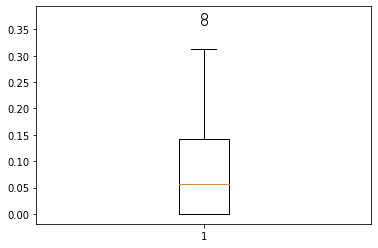

In [ ]:
import matplotlib.pyplot as plt
plt.boxplot(df_translit['CER'])

In [ ]:
max_cer = df_translit['CER'].describe()['max']

print('Maximum CER results in lower bound of accuracy at:',str((1- max_cer) * 100) + '%')

Maximum CER results in lower bound of accuracy at: 62.5%


In [ ]:
df_translit[df_translit['CER'] == 0.0].count()

source       40
target       40
romanized    40
Edit_dist    40
CER          40
dtype: int64

In [ ]:
df_translit[df_translit['CER'] > 0.0].count()

source       60
target       60
romanized    60
Edit_dist    60
CER          60
dtype: int64

In [ ]:
df_translit[df_translit['CER'] > 0.1].count()

source       37
target       37
romanized    37
Edit_dist    37
CER          37
dtype: int64

In [ ]:
df_translit[df_translit['CER'] > 0.2].count()

source       15
target       15
romanized    15
Edit_dist    15
CER          15
dtype: int64

In [ ]:
df_translit[df_translit['CER'] > 0.3].count()

source       4
target       4
romanized    4
Edit_dist    4
CER          4
dtype: int64

## calculate character error rate

In [ ]:
# not needed, used to test tfserving

tokenized_input_sentence = source_vectorization(['وادي'])


decoded_sentence = "["

tokenized_target_sentence = target_vectorization([decoded_sentence])[:, :-1]

print(tokenized_input_sentence)
print(tokenized_target_sentence)

tf.Tensor(
[[ 9  2 12  5  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0]], shape=(1, 128), dtype=int64)
tf.Tensor(
[[5 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]], shape=(1, 128), dtype=int64)


In [ ]:
input_text = 'بغداد,Baghdād,,,,,'.split(',')
#input_text = 'جبل هارون,Jabal Hārūn,,,,,'.split(',')
#input_text = 'الشام,Ash Shām,,,,,'.split(',')

arabic, latin = input_text[0], input_text[1]

print(arabic)
print(latin)
print(decode_sequence(arabic))

بغداد
Baghdād
[baghdād]
